# Kaggle Dataset

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [2]:
df= pd.read_csv("combined_dataset.csv")
# df = df.drop(columns=['ranking','isIp','valid'])


In [3]:
df_bad= df.where(df['label']==0).dropna()
df_good= df.where(df['label']==1).dropna()

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_bad.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000,39996.00000
mean,3163651.34903,0.00000,0.72987,6206.19347,36.63134,0.00030,0.00000,0.05456,16.43947,2.10104,0.00000
std,4581849.37379,0.00000,0.44403,4093.98620,13.72282,0.01732,0.00000,0.22711,4.00063,0.54955,0.00000
min,1.00000,0.00000,0.00000,0.00000,10.00000,0.00000,0.00000,0.00000,5.00000,1.00000,0.00000
25%,6655.00000,0.00000,0.00000,0.00000,27.00000,0.00000,0.00000,0.00000,14.00000,2.00000,0.00000
50%,50115.00000,0.00000,1.00000,8035.00000,33.00000,0.00000,0.00000,0.00000,16.00000,2.00000,0.00000
75%,10000000.00000,0.00000,1.00000,9133.00000,42.00000,0.00000,0.00000,0.00000,19.00000,2.00000,0.00000
max,10000000.00000,0.00000,1.00000,15707.00000,209.00000,1.00000,0.00000,1.00000,50.00000,6.00000,0.00000


In [5]:
df_good.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000,55914.00000
mean,8232344.22492,0.00039,0.46232,1989.41029,92.71538,0.00454,0.01277,0.23175,28.39450,2.59279,1.00000
std,3791179.17174,0.01983,0.49858,2773.68186,83.04449,0.06725,0.11228,0.42195,32.21723,2.74699,0.00000
min,1.00000,0.00000,0.00000,0.00000,9.00000,0.00000,0.00000,0.00000,3.00000,0.00000,1.00000
25%,10000000.00000,0.00000,0.00000,0.00000,39.00000,0.00000,0.00000,0.00000,14.00000,1.00000,1.00000
50%,10000000.00000,0.00000,0.00000,0.00000,67.00000,0.00000,0.00000,0.00000,19.00000,2.00000,1.00000
75%,10000000.00000,0.00000,1.00000,4017.00000,108.00000,0.00000,0.00000,0.00000,27.00000,2.00000,1.00000
max,10000000.00000,1.00000,1.00000,12231.00000,2175.00000,1.00000,1.00000,1.00000,244.00000,34.00000,1.00000


In [6]:
ndf = df.drop(columns=['domain'])

In [7]:
ndf

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,10000000,0,0,0,20,0,0,1,20,2,1
1,194914,0,1,7305,42,0,0,0,12,2,0
2,10000000,0,0,0,155,0,0,0,14,1,1
3,7001,0,0,0,35,0,0,0,18,3,0
4,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95905,5001,0,1,8035,28,0,0,0,16,2,0
95906,230251,0,1,8400,47,0,0,1,27,2,0
95907,10000000,0,0,0,43,0,0,0,29,3,1
95908,2008,0,1,9862,41,0,0,0,14,2,0


In [8]:
x=ndf.drop(columns=['ranking','isIp','valid'])
x

,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,0,20,0,0,1,20,2,1
1,7305,42,0,0,0,12,2,0
2,0,155,0,0,0,14,1,1
3,0,35,0,0,0,18,3,0
4,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...
95905,8035,28,0,0,0,16,2,0
95906,8400,47,0,0,1,27,2,0
95907,0,43,0,0,0,29,3,1
95908,9862,41,0,0,0,14,2,0


In [46]:
x.shape

(95910, 8)

In [50]:
from tqdm.auto import tqdm


def iterative_training(X,y,train_range = 1000):
	X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=42)
	classifier = LogisticRegression(random_state=0)
	classifier.fit(X_train, y_train)
	print("Accuracy of moedl: Logistic Regression = ",classifier.score(X_test, y_test))

	feat_imp = pd.DataFrame(zip(X.columns,classifier.coef_[0]),columns = ['Feature','Importance'])
	feat_imp = feat_imp.sort_values(by='Importance',key=lambda x: x.abs(),ascending=False)
	display(feat_imp)

	train_result = pd.DataFrame([
		(
			(i+1)*10,
				LogisticRegression(
				random_state=0
			).fit(
				X_train[:(i+1)*10],
				y_train[:(i+1)*10]
			).score(
				X_test,y_test
			)
		)
		for i in tqdm(range(train_range))
	],
	columns = ['Number of Samples','Accuracy']
	)

	return train_result,feat_imp,X

def make_plots(
	train_result,
	feat_imp,
	X,
	data_name='combined',
	top_features=20,
	figsizes = [
		(12,2),
		(6,3),
		(6,3)
	],
	heatmap_annot = True
):
	figs,axes = zip(*[plt.subplots(figsize=s) for s in figsizes])
	
	# fig,ax = plt.subplots(figsize=(12,2))
	# dd = pd.DataFrame([((i+1),acc) for i,acc in enumerate(acc_list)][:100],columns=)
	sns.lineplot(
		data = train_result,
		x = 'Number of Samples',
		y = 'Accuracy',
		ax= axes[0],
	)
	figs[0].tight_layout()
	# display(fig)
	figs[0].savefig(f'../plots/{data_name}_accuracy.pdf')


	# fig,ax = plt.subplots(figsize=(6,3))
	sns.heatmap(
		X.corr(),
		annot=heatmap_annot,
		ax = axes[1],
		fmt='.2f',
	)
	figs[1].tight_layout()
	# display(fig)
	figs[1].savefig(f'../plots/{data_name}_corr.pdf')


	# fig,ax = plt.subplots(figsize=(6,3))
	# feat_imp = pd.DataFrame(zip(classifier.coef_[0],x.columns),columns=['Importance','Feature'])
	sns.barplot(
		data = feat_imp[:top_features],
		y = 'Feature',
		x = 'Importance',
		ax = axes[2],
		palette=sns.color_palette("hls", X.shape[1])
	)
	figs[2].tight_layout()
	# display(fig)
	figs[2].savefig(f'../plots/{data_name}_featimp.pdf')

	return figs,axes

def load_data(data_name='combined_dataset.csv'):
	df= pd.read_csv(data_name)

	if data_name == 'combined_dataset.csv':
		ndf = df.drop(columns=['domain'])
		X=ndf.drop(columns=['ranking','isIp','valid','label'])
		y = ndf['label']
	elif data_name == 'All.csv':
		labels = ['phishing', 'spam']
		ndf = df.loc[df['URL_Type_obf_Type'].isin(labels)]
		ndf['URL_Type_obf_Type'] = ndf['URL_Type_obf_Type'].map({'phishing':1,'spam':2})
		ndf.dropna(inplace=True)
		y= ndf['URL_Type_obf_Type']
		X=ndf.drop(columns=['URL_Type_obf_Type'])

	return X,y

Accuracy of moedl: Logistic Regression =  0.8332812011260556


,Feature,Importance
6,nosOfSubdomain,-1.30484
5,domainLen,0.14076
4,haveDash,0.10768
1,urlLen,0.04329
3,isredirect,0.02427
2,is@,0.00483
0,activeDuration,-0.00036


  0%|          | 0/100 [00:00<?, ?it/s]

((<Figure size 1200x200 with 1 Axes>,
  <Figure size 600x300 with 2 Axes>,
  <Figure size 600x300 with 1 Axes>),
 (<AxesSubplot: xlabel='Number of Samples', ylabel='Accuracy'>,
  <AxesSubplot: >,
  <AxesSubplot: xlabel='Importance', ylabel='Feature'>))

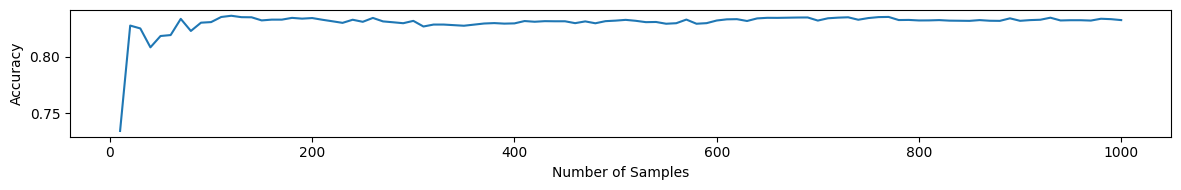

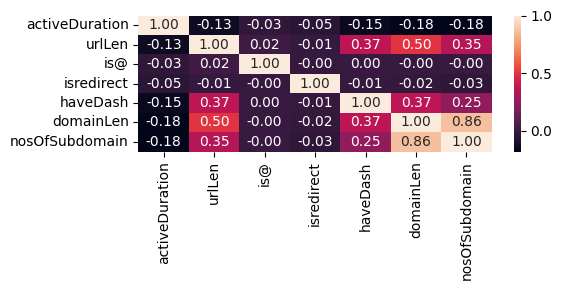

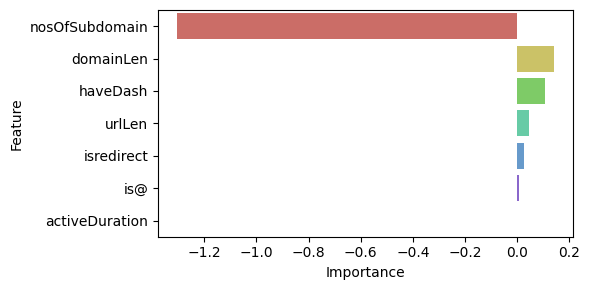

In [48]:
make_plots(
    *iterative_training(
        *load_data('combined_dataset.csv'),
        train_range=100
    ),
    'combined'
)

# ISCXURL2016 Dataset

In [20]:
df1 = pd.read_csv("All.csv")

In [21]:
df1

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.50000,14,4.40000,4,8,3,0,...,1,0,-1,0.72630,0.78449,0.89489,0.85061,NaN,-1.00000,Defacement
1,0,4,5,5.50000,14,6.00000,4,12,4,0,...,0,0,-1,0.68863,0.78449,0.81472,0.85979,0.00000,-1.00000,Defacement
2,0,4,5,5.50000,14,5.80000,4,12,5,0,...,0,0,-1,0.69505,0.78449,0.81472,0.80188,0.00000,-1.00000,Defacement
3,0,4,12,5.50000,14,5.50000,4,32,16,0,...,0,0,-1,0.64013,0.78449,0.81472,0.66321,0.00000,-1.00000,Defacement
4,0,4,6,5.50000,14,7.33333,4,18,11,0,...,0,0,-1,0.68131,0.78449,0.81472,0.80453,0.00000,-1.00000,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.75000,12,3.66667,4,20,24,3,...,3,2,7,0.69055,0.79127,0.77750,0.69023,0.65668,0.79621,spam
36703,0,4,13,3.75000,8,8.46154,4,24,23,0,...,16,15,-1,0.66549,0.82001,0.87959,0.67440,0.67467,-1.00000,spam
36704,58,3,27,6.66667,16,3.37500,3,41,34,20,...,8,7,9,0.65681,0.80114,0.68478,0.71362,0.71719,0.70524,spam
36705,35,3,13,4.33333,9,3.60000,3,15,13,7,...,9,8,3,0.72596,0.89762,0.87105,0.74593,0.75882,0.79077,spam


In [22]:
set(df1['URL_Type_obf_Type'])

{'Defacement', 'benign', 'malware', 'phishing', 'spam'}

In [23]:
labels = ['phishing', 'spam']
ndf1 = df1.loc[df1['URL_Type_obf_Type'].isin(labels)]
ndf1['URL_Type_obf_Type'] = ndf1['URL_Type_obf_Type'].map({'phishing':1,'spam':2})
ndf1.dropna(inplace=True)


In [24]:
ndf1

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
22423,166,3,31,3.66667,5,2.00000,3,57,44,7,...,-1,-1,-1,0.60013,0.87527,-1.00000,-1.00000,-1.00000,-1.00000,1
22424,153,3,19,5.00000,10,5.40000,3,47,48,34,...,5,4,3,0.61531,0.80558,0.68865,0.57931,0.57287,0.56222,1
22426,0,3,11,8.00000,18,6.90000,3,56,34,34,...,2,1,0,0.70654,0.80763,0.66078,0.70520,0.68786,0.68039,1
22427,0,3,11,8.00000,18,6.90000,3,43,29,34,...,2,1,0,0.70838,0.80763,0.66078,0.70832,0.69117,0.68380,1
22429,0,3,9,7.33333,16,9.00000,3,47,38,33,...,2,1,0,0.69355,0.80453,0.61356,0.70550,0.68818,0.68072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.75000,12,3.66667,4,20,24,3,...,3,2,7,0.69055,0.79127,0.77750,0.69023,0.65668,0.79621,2
36703,0,4,13,3.75000,8,8.46154,4,24,23,0,...,16,15,-1,0.66549,0.82001,0.87959,0.67440,0.67467,-1.00000,2
36704,58,3,27,6.66667,16,3.37500,3,41,34,20,...,8,7,9,0.65681,0.80114,0.68478,0.71362,0.71719,0.70524,2
36705,35,3,13,4.33333,9,3.60000,3,15,13,7,...,9,8,3,0.72596,0.89762,0.87105,0.74593,0.75882,0.79077,2


In [ ]:
y= ndf1['URL_Type_obf_Type']
x=ndf1.drop(columns=['URL_Type_obf_Type'])
X_train, X_test, y_train, y_test = train_test_split(x,y)
classifier = LogisticRegression(random_state=0)
classifier.fit(x, y)
predictions = classifier.predict(X_test)
print("Accuracy of model: Logistic Regression = ",accuracy_score(y_test, predictions))

Accuracy of model: Logistic Regression =  0.9367250961949551


Accuracy of moedl: Logistic Regression =  0.9273504273504274


,Feature,Importance
3,avgdomaintokenlen,-0.82858
4,longdomaintokenlen,0.45306
68,SymbolCount_Domain,0.36036
49,Query_LetterCount,0.32740
6,tld,0.31085
...,...,...
47,Filename_LetterCount,-0.00349
13,ldl_getArg,0.00235
70,SymbolCount_FileName,-0.00234
32,executable,-0.00132


  0%|          | 0/100 [00:00<?, ?it/s]

((<Figure size 1200x200 with 1 Axes>,
  <Figure size 1200x1200 with 2 Axes>,
  <Figure size 600x1000 with 1 Axes>),
 (<AxesSubplot: xlabel='Number of Samples', ylabel='Accuracy'>,
  <AxesSubplot: >,
  <AxesSubplot: xlabel='Importance', ylabel='Feature'>))

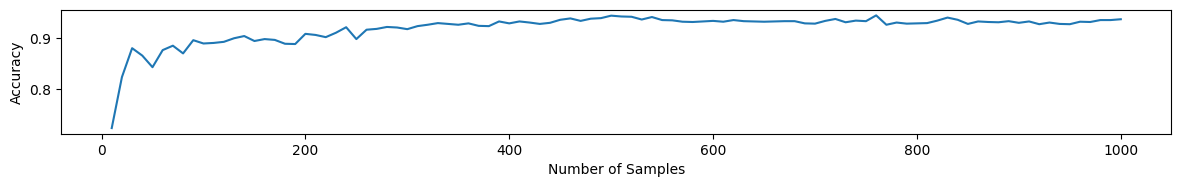

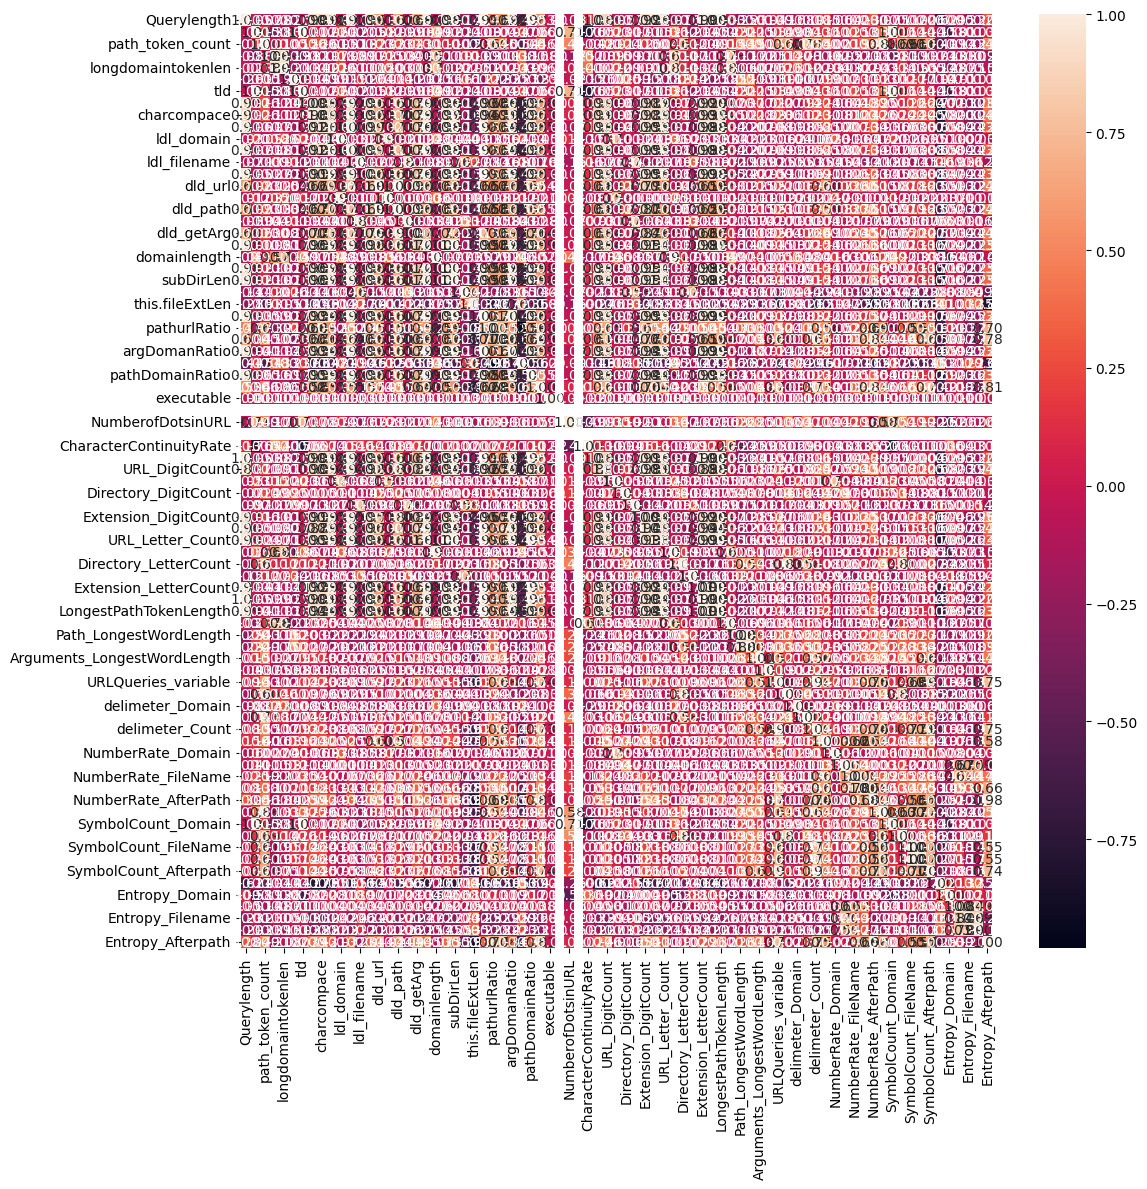

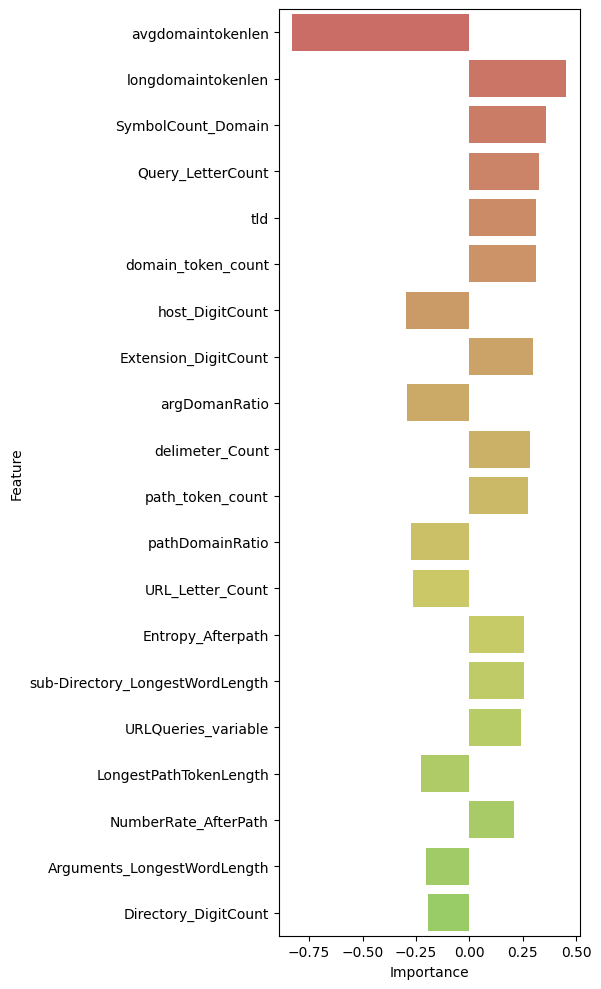

In [52]:
make_plots(
    *iterative_training(
        *load_data('All.csv'),
        train_range=100
    ),
    'iscx',
    top_features=20,
    figsizes=[
		(12,2),
		(12,12),
		(6,10)
	]
    
)

In [ ]:
#feature importance
# importance = classifier.coef_[0]
# col_list = list(x.columns)
# collist=[]
# vallist=[]
# for i,v in enumerate(importance):
# 	collist.append(col_list[i])
# 	vallist.append(v)
# featureDf= pd.DataFrame(data = [collist,vallist]).T
# pd.set_option('display.max_rows', None)
# featureDf

#plot feature importance
# figure(figsize=(20, 6), dpi=80)
# plt.bar(collist, importance)
# plt.xticks(rotation=90)
# plt.show()
  
#testing model on mini-batches (10-100)



i=0
index=10
acc_list=[]
count=0
while(True):
	x = X_train[:index]
	y = y_train[:index]
	classifier = LogisticRegression(random_state=0)
	classifier.fit(x, y)
	predictions = classifier.predict(X_test)
	acc=accuracy_score(y_test, predictions)
	acc_list.append(acc)
	count+=1
	if count > 100:
		break
	i+=1
	index+=10
	
# figure(figsize=(30, 6))
# x= [i*10 for i in range(1,len(acc_list)+1)]

# y= acc_list

# plt.plot(x,y)

# plt.xticks(np.arange(min(x), max(x)+1, 10.0),rotation=90)
# plt.xlabel("Number of samples")
# plt.ylabel("Accuracy")
# plt.title('Accruacy given N samples')
# plt.show()

In [ ]:
acc_list

[0.7342300072985091,
 0.8278594515691794,
 0.8253049734125742,
 0.808518402669169,
 0.8185799186737567,
 0.8194140339901992,
 0.8338025231988322,
 0.8230632884996351,
 0.8304139297257845,
 0.8309352517985612,
 0.8354707538317172,
 0.836565530184548,
 0.8353143572098842,
 0.835210092795329,
 0.8324470858096131,
 0.8331248045042227,
 0.8331248045042227,
 0.8346887707225524,
 0.8340110520279429,
 0.8345323741007195,
 0.8330205400896674,
 0.8316651027004484,
 0.8302575331039517,
 0.8330205400896674,
 0.8311959128349494,
 0.8346366385152747,
 0.831560838285893,
 0.8307788551767282,
 0.8299447398602857,
 0.8320300281513919,
 0.8270253362527369,
 0.8287456990928996,
 0.8287456990928996,
 0.8282243770201231,
 0.8277030549473464,
 0.8286935668856219,
 0.8296840788238974,
 0.830049004274841,
 0.8295798144093421,
 0.8297883432384527,
 0.831873631529559,
 0.831248045042227,
 0.8317693671150036,
 0.8316651027004484,
 0.8316651027004484,
 0.8299968720675633,
 0.831560838285893,
 0.829892607653008,
 

,Features,Importance
0,avgdomaintokenlen,-1.62119
1,longdomaintokenlen,0.99900
2,SymbolCount_Domain,0.78111
3,domain_token_count,0.73153
4,tld,0.73153
5,host_DigitCount,-0.60212
6,path_token_count,0.57292
7,Extension_DigitCount,0.47696
8,Directory_DigitCount,-0.44151
9,Entropy_Afterpath,0.42568


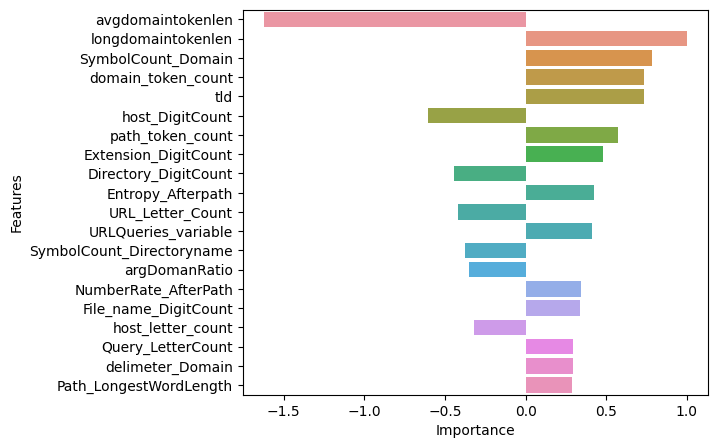

In [ ]:





# fig,ax = plt.subplots(figsize=(12,2))
# dd = pd.DataFrame([((i+1)*10,acc) for i,acc in enumerate(acc_list)][:100],columns=['Number of Samples','Accuracy'])
# sns.lineplot(
#     data = dd,
#     x = 'Number of Samples',
#     y = 'Accuracy',
#     ax= ax
# )
# fig.tight_layout()
# # display(fig)
# fig.savefig('../plots/combined_accuracy.pdf')


# fig,ax = plt.subplots(figsize=(6,3))
# sns.heatmap(
#     df.drop(
#         columns=['ranking','isIp','valid']
#     ).corr(),
#     annot=True,
#     ax = ax,
#     fmt='.2f',
# )
# fig.tight_layout()
# # display(fig)
# fig.savefig('../plots/combined_corr.pdf')


# fig,ax = plt.subplots(figsize=(6,3))
# feat_imp = pd.DataFrame(zip(classifier.coef_[0],x.columns),columns=['Importance','Feature'])
# _ = sns.barplot(
#     data = feat_imp,
#     y = 'Feature',
#     x = 'Importance',
#     ax = ax
# )
# fig.tight_layout()
# # display(fig)
# fig.savefig('../plots/combined_featimp.pdf')





# fig.savefig('../plots/combined_features.pdf')

# res





feat_imp = pd.DataFrame(zip(x.columns,classifier.coef_[0]),columns = ['Features','Importance'])

feat_imp = feat_imp.sort_values(by='Importance',key=lambda x: x.abs(),ascending=False).reset_index(drop=True)


display(feat_imp[:20])

fig,ax = plt.subplots(figsize=(6,5))
_ = sns.barplot(
    data = feat_imp[:20],
    y = 'Features',
    x = 'Importance'
).set(
    # xticklabels = feat_imp.Features[:20],
    # ylim=(-1.3,1)
)